### 0.0. Imports

In [61]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 0.1. Helper Functions

#### 0.2. Loading Data

In [ ]:
df_sales_raw = pd.read_csv(r'datasets\train.csv',low_memory=False)
df_store_raw = pd.read_csv(r'datasets\store.csv',low_memory=False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left',on='Store')


In [ ]:
df_raw.sample()

### 1.0. Descrição dos Dados

In [ ]:
df1 = df_raw.copy()

#### 1.1. Rename Columns

In [ ]:
df1.columns
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

# Cria uma função lambda e aplica em todos os registros de cols_old
snakecase = lambda x: inflection.underscore(x) 
cols_new = list( map ( snakecase, cols_old ) )

# Redefine o nme das colunas
df1.columns = cols_new

#### 1.2. Data Dimensions

In [ ]:
print( f'Number of Rows: { df1.shape[0] }' )
print( f'Number of Collumns: { df1.shape[1] }' )

#### 1.3. Data Types

In [ ]:
df1['date'] =pd.to_datetime( df1['date'] )
df1.dtypes

#### 1.4. Check NA

In [ ]:
df1.isna().sum()

#### 1.5. Fillout NA

In [ ]:
# competition_distance
# >>>>> substituir dados faltantes por um valor muito maior que o máximo
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan(x) else x )

# competition_open_since_month
# >>>>> Ou não tem competição ou não se sabe
# >>>>> substituir dados faltantes pelo mes da venda
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )


# competition_open_since_year 
# >>>>> Ou não tem competição ou não se sabe
# >>>>> substituir dados faltantes pelo ano da venda
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )

# promo2_since_week           
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

# promo2_since_year           
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

# promo_interval
month_map = { 1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec' }
df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map( month_map )
df1['is_promo'] = df1[['promo_interval','month_map']].apply( lambda x :     
    0 if x['promo_interval'] == 0 else 
    1 if x['month_map'] in x['promo_interval'].split(',') else 
    0, axis=1)


#### 1.6. Change Types

In [ ]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

df1.dtypes

#### 1.7. Descrição Statistica

In [ ]:
num_attributes = df1.select_dtypes( include=['int64','int32','float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64','int32','float64','datetime64[ns]'] )

In [ ]:
cat_attributes.sample(2)

##### 1.7.1. Atributos Númericos

In [ ]:
# Tendencia central - mean, median
_mean = pd.DataFrame( num_attributes.apply( np.mean ) ).T
_median = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
_std = pd.DataFrame( num_attributes.apply( np.std ) ).T
_min = pd.DataFrame( num_attributes.apply( min ) ).T
_max = pd.DataFrame( num_attributes.apply( max ) ).T
_range = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
_skew = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
_kurtosis = pd.DataFrame( num_attributes.apply( lambda x: x. kurtosis() ) ).T
 

m = pd.concat( [_min, _max, _range, _mean, _median, _std, _skew, _kurtosis] ).T.reset_index()
m.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m



In [ ]:
sns.distplot( df1['sales'] )

##### 1.7.2. Atributos Categoricos

In [57]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot: xlabel='assortment', ylabel='sales'>

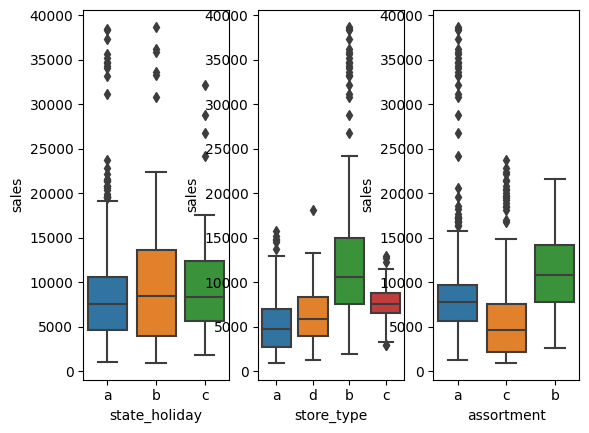

In [63]:
aux1 = df1[(df1['state_holiday'] != '0') &  ( df1['sales'] > 0 ) ]

plt.subplot(1,3,1 )
sns.boxplot ( x='state_holiday' , y='sales' , data=aux1 )

plt.subplot(1,3,2 )
sns.boxplot ( x='store_type' , y='sales' , data=aux1 )

plt.subplot(1,3,3 )
sns.boxplot ( x='assortment' , y='sales' , data=aux1 )

#### 1.1. Descrição dos Dados